<h1><b>Analysis and Prediction of Global Gross Agricultural Production</b></h1>


We'll see how the 200+ countries' and areas' Gross Agricultural Production performance stacked up by finding the top 10 highest producing nations and comparing them to each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb

prodind = "../input/fao_data_production_indices_data.csv"
pdid = pd.read_csv(prodind)

pdid.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,A,agriculture_pin


In [2]:
pdid.tail()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
311629,Zimbabwe,438,Net per capita PIN (base 1999-2001),1963.0,Int. $,81.0,A,non_food_pin
311630,Zimbabwe,438,Net per capita PIN (base 1999-2001),1962.0,Int. $,98.0,A,non_food_pin
311631,Zimbabwe,438,Net per capita PIN (base 1999-2001),1961.0,Int. $,103.0,A,non_food_pin
311632,fnSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,non_food_pin
311633,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,non_food_pin


We can get rid of the footnote rows at the end of the dataset.

In [3]:
del pdid['element_code']
del pdid['value_footnotes']
pdid.head()

,country_or_area,element,year,unit,value,category
0,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,agriculture_pin
1,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,agriculture_pin
2,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,agriculture_pin
3,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,agriculture_pin
4,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,agriculture_pin


Renaming the columns for clarity.

In [4]:
headers = ["Region", "Production", "Year", "Unit", "Price", "Category"]
pdid.columns = headers
pdid.head()

,Region,Production,Year,Unit,Price,Category
0,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,agriculture_pin
1,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,agriculture_pin
2,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,agriculture_pin
3,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,agriculture_pin
4,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,agriculture_pin


Looking for null values throughout the dataset.

In [5]:
pdid.replace("?", np.nan, inplace = True)
no_data = pdid.isnull()
for column in no_data.columns.values.tolist():
    print(column)
    print (no_data[column].value_counts())
    print("")    

Region
False    311634
Name: Region, dtype: int64

Production
False    311624
True         10
Name: Production, dtype: int64

Year
False    311624
True         10
Name: Year, dtype: int64

Unit
False    311624
True         10
Name: Unit, dtype: int64

Price
False    311624
True         10
Name: Price, dtype: int64

Category
False    311634
Name: Category, dtype: int64



In [6]:
print(pdid.shape)

(311634, 6)


In [7]:
pdid.dropna(inplace=True)
print(pdid.shape)

(311624, 6)


In [8]:
pdid.dtypes

Region         object
Production     object
Year          float64
Unit           object
Price         float64
Category       object
dtype: object

Change the year property from float to object so it is easier to reference later, and price to int for graphing.

In [9]:
pdid[["Price", "Year"]] = pdid[["Price", "Year"]].astype("int")
pdid[["Year"]] = pdid[["Year"]].astype("object")
pdid.dtypes

Region        object
Production    object
Year          object
Unit          object
Price          int64
Category      object
dtype: object

In [10]:
pdid.replace({'Gross Production 1999-2001 (1000 I$)':'Gross Production'}, inplace=True)
pdid.head()

,Region,Production,Year,Unit,Price,Category
0,Afghanistan,Gross Production,2007,1000 Int. $,2486910,agriculture_pin
1,Afghanistan,Gross Production,2006,1000 Int. $,2278516,agriculture_pin
2,Afghanistan,Gross Production,2005,1000 Int. $,2524097,agriculture_pin
3,Afghanistan,Gross Production,2004,1000 Int. $,2226346,agriculture_pin
4,Afghanistan,Gross Production,2003,1000 Int. $,2289434,agriculture_pin


The year and unit information in the production column's values is redundant (and in case of the timeframe, incorrect). We can rename them for clarity. The focus for now is on Gross agricultural production, but this dataset contains different categories of product as well as measures of production. We'll single out the properties we are interested in without removing the original dataframe's values in case we want to look at other information later.

In [11]:
pdid.replace({'Net Production 1999-2001 (1000 I$)' : 'Net Production', 'Gross PIN (base 1999-2001)' : 'Gross PIN', 'Grs per capita PIN (base 1999-2001)':'Gross Per Capita PIN', 'Net PIN (base 1999-2001)':'Net PIN', 'Net per capita PIN (base 1999-2001)':'Net Per Capita PIN'}, inplace=True)

In [12]:
pdid.Category.unique()

array(['agriculture_pin', 'crops_pin', 'food_pin', 'livestock_pin',
       'non_food_pin'], dtype=object)

In [13]:
pdid.head()

,Region,Production,Year,Unit,Price,Category
0,Afghanistan,Gross Production,2007,1000 Int. $,2486910,agriculture_pin
1,Afghanistan,Gross Production,2006,1000 Int. $,2278516,agriculture_pin
2,Afghanistan,Gross Production,2005,1000 Int. $,2524097,agriculture_pin
3,Afghanistan,Gross Production,2004,1000 Int. $,2226346,agriculture_pin
4,Afghanistan,Gross Production,2003,1000 Int. $,2289434,agriculture_pin


In [14]:
pdid1 = pdid.drop(pdid[pdid['Production'] != 'Gross Production'].index)
pdid2 = pdid1.drop(pdid1[pdid1['Category'] != 'agriculture_pin'].index)
pdid2.tail()

,Region,Production,Year,Unit,Price,Category
63856,Zimbabwe,Gross Production,1965,1000 Int. $,687546,agriculture_pin
63857,Zimbabwe,Gross Production,1964,1000 Int. $,740738,agriculture_pin
63858,Zimbabwe,Gross Production,1963,1000 Int. $,625430,agriculture_pin
63859,Zimbabwe,Gross Production,1962,1000 Int. $,679806,agriculture_pin
63860,Zimbabwe,Gross Production,1961,1000 Int. $,640644,agriculture_pin


In [15]:
gross_agri_prod = pdid2[['Region', 'Year', 'Price']]
gross_agri_prod.head()

,Region,Year,Price
0,Afghanistan,2007,2486910
1,Afghanistan,2006,2278516
2,Afghanistan,2005,2524097
3,Afghanistan,2004,2226346
4,Afghanistan,2003,2289434


Now the data is much more focused, but not easy to read. Our index is arbitrary and our first column contains tons of duplicates: our dataframe is long when it should be wide. We'll pivot it to make a wide dataframe with a meaningful index and no repeated values.

In [16]:
gross_agri_prod2 = gross_agri_prod.pivot(index='Region', columns='Year', values='Price')
gross_agri_prod2.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1365296.0,1393857.0,1399596.0,1489104.0,1550441.0,1575538.0,1717742.0,1790886.0,1829964.0,1658073.0,1553439.0,1657400.0,1814677.0,1892543.0,1956970.0,2084133.0,1887578.0,1990109.0,1953669.0,1928668.0,1916415.0,1884044.0,1841872.0,1775966.0,1656288.0,1500417.0,1562225.0,1532319.0,1509873.0,1618635.0,1661747.0,1613963.0,1735804.0,1857878.0,1942334.0,2078803.0,2251692.0,2373424.0,2345362.0,1935142.0,1863022.0,2216530.0,2289434.0,2226346.0,2524097.0,2278516.0,2486910.0
Africa +,40235510.0,42469530.0,44027500.0,44810030.0,45741720.0,45589030.0,48631010.0,49961520.0,52174760.0,54258640.0,55418030.0,54737500.0,54336580.0,58391760.0,58842150.0,58654740.0,58326760.0,59848880.0,59938050.0,61582680.0,63340980.0,63776500.0,63571410.0,64183610.0,68935720.0,71800660.0,72221780.0,76232040.0,79358450.0,81735750.0,87530120.0,86604300.0,89350070.0,91367420.0,92443760.0,101665300.0,101014400.0,105472200.0,109259900.0,110363900.0,113037800.0,116928400.0,122382000.0,126063000.0,130236700.0,135449900.0,130351100.0
Albania,254771.0,274898.0,274310.0,301150.0,291325.0,329062.0,343560.0,343240.0,351221.0,366693.0,378555.0,390509.0,420207.0,428892.0,435199.0,480449.0,501183.0,524702.0,548072.0,532985.0,555893.0,573537.0,615443.0,581904.0,576715.0,583574.0,599481.0,557620.0,629160.0,602837.0,485462.0,539687.0,615519.0,656860.0,720032.0,717104.0,682452.0,706612.0,700072.0,733849.0,747971.0,755188.0,789269.0,819870.0,813707.0,858366.0,824818.0
Algeria,1639496.0,1738226.0,1742950.0,1551149.0,1793427.0,1209707.0,1345804.0,1729201.0,1601248.0,1658379.0,1712433.0,1563786.0,1482694.0,1587569.0,1755595.0,1650689.0,1382466.0,1394996.0,1554904.0,1706639.0,1724088.0,1584964.0,1661411.0,1807181.0,2226068.0,2233818.0,2241221.0,2125791.0,2367970.0,2281441.0,2678231.0,2809210.0,2671924.0,2468289.0,2803817.0,3276477.0,2650918.0,3033235.0,3107780.0,2941046.0,3215132.0,3269373.0,3863700.0,4211766.0,4221735.0,4404404.0,4225072.0
American Samoa,1750.0,1785.0,2000.0,2005.0,2057.0,2104.0,1941.0,1875.0,1921.0,1850.0,1702.0,1675.0,1653.0,1614.0,1591.0,1532.0,1507.0,1451.0,1286.0,1382.0,1385.0,1400.0,1378.0,1336.0,1308.0,1335.0,1282.0,1288.0,1292.0,1354.0,1313.0,1272.0,1289.0,1300.0,1309.0,1309.0,1321.0,2221.0,1781.0,1872.0,2054.0,2126.0,2469.0,2365.0,2365.0,2403.0,2415.0


Now we're getting somewhere. Let's get a total of Gross Production over 1961-2007 for each Region in the dataframe and sort them by that total, then swap the index and columns to prepare for graphing.

In [17]:
gross_agri_prod2.columns = gross_agri_prod2.columns.astype(str)
years = list(map(str, range(1961, 2008)))
gap = gross_agri_prod2
gap['Total'] = gap.sum(axis=1)
gap.sort_values(['Total'], ascending=False, axis=0, inplace=True)
gap = gap[years].transpose()
gap.fillna(0, inplace=True)
gap.head()

Region,World +,Asia +,Europe +,Americas +,Eastern Asia +,European Union +,China,Northern America +,Southern Asia +,United States of America,Eastern Europe +,India,South America +,Western Europe +,Africa +,USSR,Southern Europe +,South-Eastern Asia +,Least Developed Countries +,Brazil,France,Western Asia +,Northern Europe +,Germany,LandLocked developing countries +,Italy,Western Africa +,Central America +,Oceania +,Eastern Africa +,Argentina,Northern Africa +,Australia and New Zealand +,Indonesia,Turkey,Poland,Spain,Pakistan,Mexico,Japan,...,French Polynesia,Cape Verde,New Caledonia,Qatar,Bahrain,Saint Vincent and Grenadines,Grenada,Bahamas,Sao Tome and Principe,Kiribati,Brunei Darussalam,Pacific Is,French Guiana,Maldives,Saint Kitts and Nevis,Falkland Islands,Seychelles,Montenegro,Guam,Antigua and Barbuda,Cook Islands,Western Sahara,Liechtenstein,US Virgin Islands,Wallis and Futuna Islands,"Micronesia, Federated States of",Montserrat,Bermuda,American Samoa,Netherlands Antilles,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,607542000.0,179038900.0,224694200.0,151225800.0,73769500.0,136224300.0,58340740.0,98065620.0,68169040.0,89816580.0,105414400.0,50142680.0,39973120.0,57963600.0,40235510.0,72768810.0,39557060.0,23422710.0,29977640.0,16564600.0,23408500.0,13677660.0,21759120.0,22077690.0,10407340.0,18638310.0,11654800.0,8819005.0,12347550.0,11222390.0,11950390.0,8858093.0,11552370.0,7383684.0,9801625.0,15955180.0,9798405.0,6247493.0,6632554.0,11464360.0,...,19662.0,10914.0,16888.0,3475.0,7649.0,13593.0,11834.0,7088.0,14715.0,8037.0,4876.0,10744.0,3249.0,4108.0,10359.0,5794.0,5629.0,0.0,2185.0,6124.0,4821.0,1511.0,1507.0,3821.0,1870.0,0.0,1253.0,2086.0,1750.0,1262.0,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1962,627390800.0,184564800.0,231333600.0,155494300.0,76666790.0,141587400.0,60690860.0,100191400.0,68317880.0,90275010.0,105069100.0,50015760.0,41833470.0,63679320.0,42469530.0,73961920.0,40356620.0,25133790.0,30716610.0,17344940.0,26654000.0,14446330.0,22228630.0,24241470.0,10852900.0,19289340.0,12090510.0,9435147.0,13528520.0,11641250.0,12519320.0,10062710.0,12695820.0,8054871.0,10152630.0,14575640.0,9825465.0,6589936.0,7098856.0,12075860.0,...,22214.0,11511.0,16967.0,4026.0,7705.0,13985.0,12680.0,7348.0,15493.0,7436.0,5712.0,10970.0,3648.0,4275.0,9834.0,6177.0,6017.0,0.0,2323.0,6084.0,4717.0,886.0,1594.0,4143.0,1876.0,0.0,1320.0,2127.0,1785.0,1364.0,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
1963,642877400.0,191333500.0,231958200.0,161601700.0,80440290.0,144877100.0,63942700.0,104454200.0,70574070.0,93700380.0,103816900.0,51367730.0,43231170.0,63442000.0,44027500.0,70531000.0,42361000.0,25545950.0,32014990.0,17443010.0,25202710.0,14773220.0,22338240.0,25340780.0,10954730.0,18918070.0,12613440.0,9926016.0,13956470.0,11854310.0,13694660.0,10491060.0,13089700.0,7650931.0,10635830.0,15858570.0,11420400.0,6897616.0,7394225.0,12370320.0,...,21388.0,11891.0,17361.0,4401.0,7792.0,13442.0,13371.0,7743.0,13265.0,6766.0,5162.0,11459.0,3234.0,4442.0,9001.0,6024.0,5582.0,0.0,2452.0,7569.0,5044.0,870.0,1535.0,4008.0,1880.0,0.0,1309.0,2318.0,2000.0,1359.0,269.0,719.0,0.0,458.0,598.0,476.0,185.0,112.0,0.0,0.0
1964,666254900.0,199301800.0,244458600.0,162971000.0,85929400.0,146292400.0,68462610.0,104573900.0,71804500.0,94323650.0,115849400.0,52267720.0,43521450.0,63286350.0,44810030.0,81216890.0,42642900.0,26191640.0,32736070.0,17658130.0,25321080.0,15376270.0,22679990.0,24843610.0,11495020.0,19893760.0,13222540.0,10726710.0,14713460.0,12331920.0,12918230.0,10258000.0,13822230.0,8076970.0,10758440.0,16558460.0,10645910.0,6982853.0,8044878.0,12829560.0,...,20679.0,12522.0,18295.0,4757.0,7772.0,14095.0,12910.0,8093.0,15915.0,7276.0,4708.0,11393.0,2634.0,4605.0,9567.0,5948.0,6672.0,0.0,2244.0,7789.0,5141.0,884.0,1481.0,5766.0,1889.0,0.0,1319.0,2496.

This dataset contains values such as 'Asia +' and 'Eastern Asia +', which reference some of the same nations. This could lead to a misleading/vague graph, especially if every individual country is overshadowed by the 'World +' column, which is a grand total of the entire world's Gross Agricultural Production. Luckily, they are all marked with a '+', so we can filter them out.

In [18]:
gap_unwant = [col for col in gap.columns if '+' in col]
gap = gap.drop(gap_unwant, axis=1)
gap.head()

Region,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey,Poland,Spain,Pakistan,Mexico,Japan,Canada,United Kingdom,Russian Federation,Australia,Nigeria,Thailand,"Iran, Islamic Republic of",Netherlands,Bangladesh,Egypt,Viet Nam,Romania,Philippines,South Africa,Colombia,Ukraine,Hungary,"Korea, Republic of",New Zealand,Greece,Myanmar,Yugoslav SFR,Denmark,Malaysia,...,French Polynesia,Cape Verde,New Caledonia,Qatar,Bahrain,Saint Vincent and Grenadines,Grenada,Bahamas,Sao Tome and Principe,Kiribati,Brunei Darussalam,Pacific Is,French Guiana,Maldives,Saint Kitts and Nevis,Falkland Islands,Seychelles,Montenegro,Guam,Antigua and Barbuda,Cook Islands,Western Sahara,Liechtenstein,US Virgin Islands,Wallis and Futuna Islands,"Micronesia, Federated States of",Montserrat,Bermuda,American Samoa,Netherlands Antilles,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0,9801625.0,15955180.0,9798405.0,6247493.0,6632554.0,11464360.0,8246525.0,10620960.0,0.0,8033542.0,6075942.0,4480766.0,2997640.0,4700973.0,5295969.0,3361283.0,3471556.0,5358930.0,3351690.0,3986965.0,3135949.0,0.0,3887535.0,2168330.0,3518831.0,3427934.0,2412070.0,5008954.0,3800428.0,1182611.0,...,19662.0,10914.0,16888.0,3475.0,7649.0,13593.0,11834.0,7088.0,14715.0,8037.0,4876.0,10744.0,3249.0,4108.0,10359.0,5794.0,5629.0,0.0,2185.0,6124.0,4821.0,1511.0,1507.0,3821.0,1870.0,0.0,1253.0,2086.0,1750.0,1262.0,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0,10152630.0,14575640.0,9825465.0,6589936.0,7098856.0,12075860.0,9913775.0,11154420.0,0.0,9014986.0,6347033.0,4802374.0,3098577.0,4877780.0,5038676.0,4024906.0,3677532.0,5022678.0,3604865.0,4022348.0,3391935.0,0.0,3993613.0,2062573.0,3680832.0,3084512.0,2728966.0,5175146.0,3833062.0,1204312.0,...,22214.0,11511.0,16967.0,4026.0,7705.0,13985.0,12680.0,7348.0,15493.0,7436.0,5712.0,10970.0,3648.0,4275.0,9834.0,6177.0,6017.0,0.0,2323.0,6084.0,4717.0,886.0,1594.0,4143.0,1876.0,0.0,1320.0,2127.0,1785.0,1364.0,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0,10635830.0,15858570.0,11420400.0,6897616.0,7394225.0,12370320.0,10751080.0,11093710.0,0.0,9354546.0,6669741.0,5134577.0,3067630.0,4875756.0,5590852.0,4121380.0,3677420.0,5096700.0,3745430.0,4247542.0,3364217.0,0.0,4320800.0,2259366.0,3735158.0,3401255.0,2863719.0,5524450.0,3823419.0,1265997.0,...,21388.0,11891.0,17361.0,4401.0,7792.0,13442.0,13371.0,7743.0,13265.0,6766.0,5162.0,11459.0,3234.0,4442.0,9001.0,6024.0,5582.0,0.0,2452.0,7569.0,5044.0,870.0,1535.0,4008.0,1880.0,0.0,1309.0,2318.0,2000.0,1359.0,269.0,719.0,0.0,458.0,598.0,476.0,185.0,112.0,0.0,0.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0,10758440.0,16558460.0,10645910.0,6982853.0,8044878.0,12829560.0,10247080.0,11375160.0,0.0,9962123.0,6863586.0,5028888.0,3158230.0,4977735.0,5580048.0,4193772.0,3730614.0,5195636.0,3802333.0,4072050.0,3491027.0,0.0,4375565.0,2696948.0,3860104.0,3428417.0,2949201.0,5677906.0,3910496.0,1279135.0,...,20679.0,12522.0,18295.0,4757.0,7772.0,14095.0,12910.0,8093.0,15915.0,7276.0,4708.0,11393.0,2634.0,4605.0,9567.0,5948.0,6672.0,0.0,2244.0,7789.0,5141.0,884.0,1481.0,5766.0,1889.0,0.0,1319.0,2496.0,2005.0,1426.0,221.0,856.0,0.0,665.0,403.0,513.0,191.0,281.0,0.0,0.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0,10655710.0,16230700.0,10643360.0,7333663.0,8604104.0,13079980.0,11143530.0,11698620.0,0.0,9565166.0,7203534.0,

Now we can seet a list of all individual nations/regions, starting with the most agricultural production and ending with the least. At 220 columns, that's a bit much to graph. Let's get a list of the top 10 Gross Agricultural Producing Nations.

In [19]:
gap_top10 = gap.transpose()
gap_top10 = gap_top10.head(10)
gap_top10tran = gap_top10.transpose()
gap_top10tran

Region,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia
Year,,,,,,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0
1966,80445930.0,97277180.0,49309560.0,90781310.0,19238750.0,25447410.0,25236310.0,21158350.0,13410430.0,8219212.0
1967,81718660.0,101177900.0,52731470.0,92659220.0,20650260.0,27156150.0,27208190.0,22352040.0,14588430.0,7840406.0
1968,81474800.0,103420600.0,55208160.0,98507460.0,21256810.0,28165500.0,27321930.0,21546680.0,13747960.0,9096512.0
1969,82195340.0,104285200.0,56970870.0,93745540.0,22008700.0,26664590.0,26233890.0,22380610.0,14798930.0,9155070.0


Interestingly, the USSR is still in the top 10 after dropping off the map in 1992. Let's get a visual.

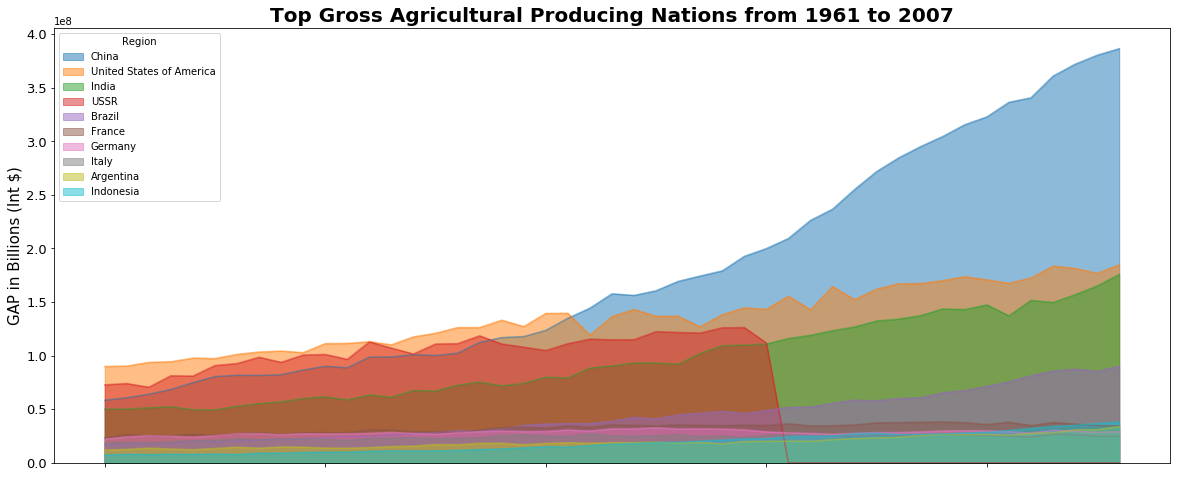

In [20]:
gap_top10tran.fillna(0, inplace=True)
ax = gap_top10tran.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

Now we've got an area graph of the top 10 gross agricultural producers from 1961 to 2007. A box plot might show us some more about this dataset.

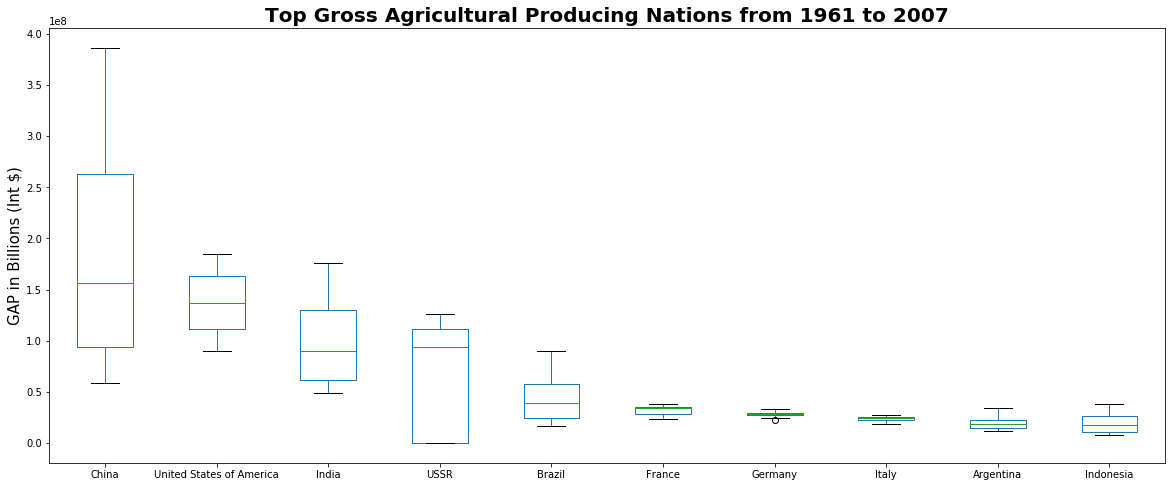

In [21]:
ax0 = gap_top10tran.plot(kind='box', figsize=(20,8))
ax0.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax0.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax0.tick_params(labelsize=10)

You can analyze variance in production over time separately for each country with this.

Now let's use this data to predict what gross agricultural production might be in the future.

In [22]:
gap = gap.reset_index()
gap_reg = gap[['Year', 'China', 'United States of America', 'India', 'USSR', 'Brazil', 'France', 'Germany', 'Italy', 'Argentina', 'Indonesia']].copy()
gap_reg.head()

Region,Year,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia
0,1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0
1,1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0
2,1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0
3,1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0
4,1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0


Let's see how our model expects China to perform in the future.

In [23]:
countries = gap_reg[['China', 'United States of America', 'India', 'USSR', 'Brazil', 'France', 'Germany', 'Italy', 'Argentina', 'Indonesia']]

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

lm = LinearRegression()

X = gap_reg[['Year']]
Y = gap_reg[['China']]

lm.fit(X,Y)

pred=lm.predict(Y)
pred_china = pred[0:11]
pred_china  

array([[4.20794211e+14],
       [4.37745489e+14],
       [4.61200820e+14],
       [4.93802666e+14],
       [5.39138095e+14],
       [5.80237652e+14],
       [5.89417779e+14],
       [5.87658831e+14],
       [5.92856044e+14],
       [6.24209690e+14],
       [6.49765070e+14]])

In [ ]:
plt.figure(figsize=(20, 10))
sb.jointplot(x="Year", y="China", data=gap_reg.astype(int), kind="reg")
plt.ylim(0,)

Now let's get predictions for the other top five countries and see what the model thinks they'll look like from 2008 to 2018. We'll exclude the USSR.

In [24]:
X = gap_reg[['Year']]
Y = gap_reg[['United States of America']]
lm.fit(X,Y)
pred1=lm.predict(Y)
pred_usa = pred1[0:11]

X = gap_reg[['Year']]
Y = gap_reg[['India']]
lm.fit(X,Y)
pred2=lm.predict(Y)
pred_ind = pred2[0:11]

X = gap_reg[['Year']]
Y = gap_reg[['Brazil']]
lm.fit(X,Y)
pred3=lm.predict(Y)
pred_bra = pred3[0:11]

X = gap_reg[['Year']]
Y = gap_reg[['France']]
lm.fit(X,Y)
pred4=lm.predict(Y)
pred_fra = pred4[0:11]

In [25]:
pred_col = ['China', 'United States of America', 'India', 'Brazil', 'France']
pred_indx = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
preds = pd.DataFrame(index=pred_indx, columns=pred_col)
preds['China'] = pred_china
preds['United States of America'] = pred_usa
preds['India'] = pred_ind
preds['Brazil'] = pred_bra
preds['France'] = pred_fra
preds

,China,United States of America,India,Brazil,France
2008,4.207942e+14,1.835309e+14,1.353149e+14,2.549534e+13,6.509957e+12
2009,4.377455e+14,1.844676e+14,1.349724e+14,2.669654e+13,7.412610e+12
2010,4.612008e+14,1.914672e+14,1.386210e+14,2.684750e+13,7.008971e+12
2011,4.938027e+14,1.927408e+14,1.410498e+14,2.717864e+13,7.041893e+12
2012,5.391381e+14,1.996484e+14,1.335760e+14,3.134885e+13,7.447907e+12
2013,5.802377e+14,1.987761e+14,1.330666e+14,2.961173e+13,7.077028e+12
2014,5.894178e+14,2.067470e+14,1.423013e+14,3.178451e+13,7.552271e+12
2015,5.876588e+14,2.113299e+14,1.489852e+14,3.271819e+13,7.832996e+12
2016,5.928560e+14,2.130966e+14,1.537422e+14,3.387559e+13,7.415556e+12
2017,6.242097e+14,2.100339e+14,1.620622e+14,3.468403e+13,7.868693e+12


Now let's take a look at these predicted values on an area and box plot.

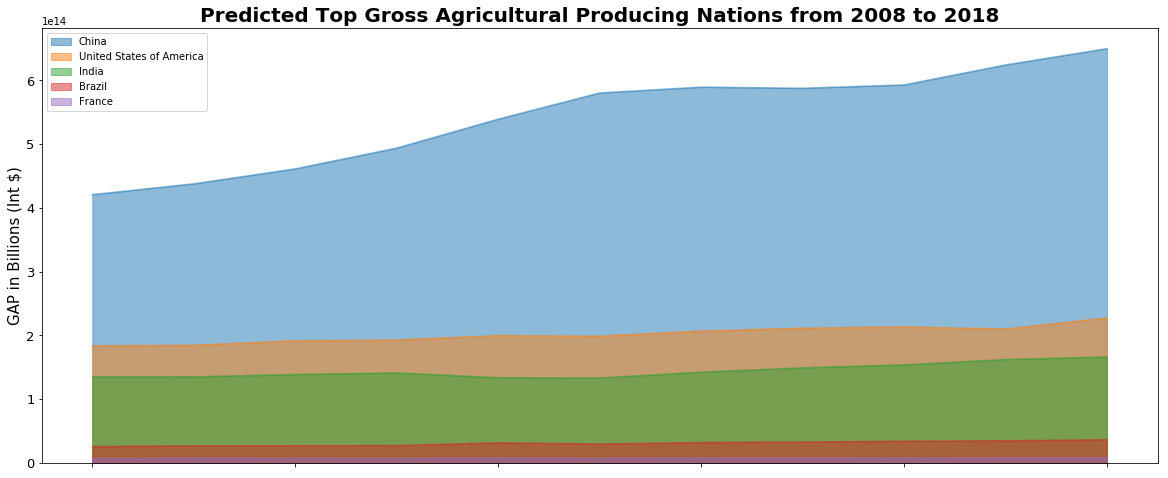

In [26]:
ax = preds.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

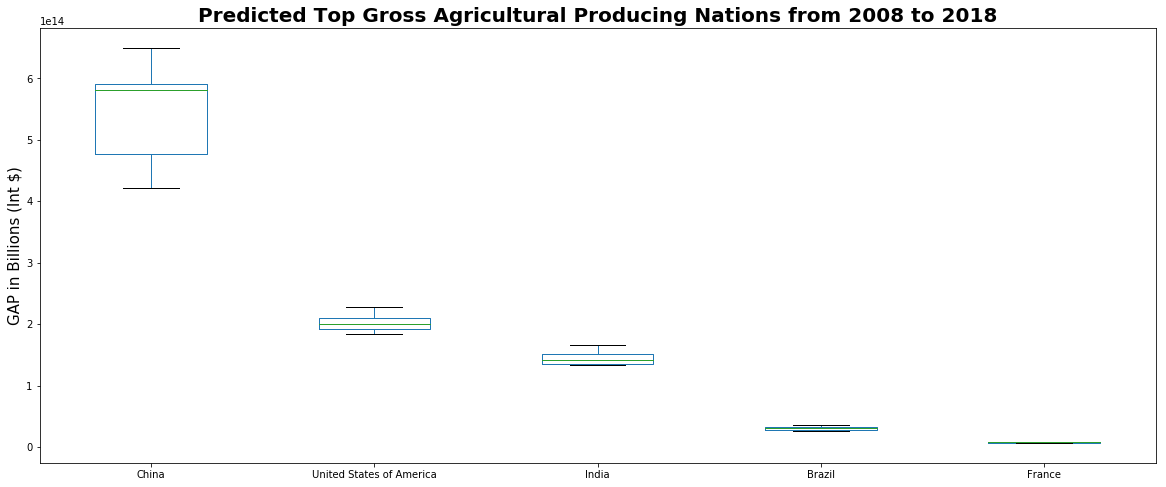

In [27]:
ax0 = preds.plot(kind='box', figsize=(20,8))
ax0.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax0.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax0.tick_params(labelsize=10)

There is less variance in this predicted model. While more biased, these data do resemble trends in the original dataset.

Look at India. Seeing the original dataset could lead one to believe India may have surpassed the United States in Gross Agricultural Production given a few more years, but our model instead predicted stagnation. Maybe comparing regression models of the US to India will yield different results.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


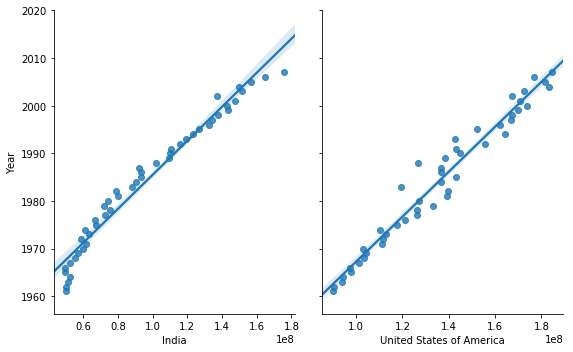

In [28]:
sb.pairplot(gap_reg.astype(int), x_vars=["India", "United States of America"], y_vars=["Year"],
             size=5, aspect=.8, kind="reg");

Side by side, we can see why our model came to the conclusion it did. India's production starting around 2000 begins dipping below the regression line, whereas the United States' continues on trend with steady gains. Looking at the area plot of our original data did not make this as clear as the pairplot has.

It can be concluded from the original and predicted data that China's Gross Agricultural Production outpaced all other individual nations significantly. The United States has kept steady yet lower gains in Agricultural Production, securing its spot in second place above India as of 2007, and is predicted to continue doing so.

I would love to find a similar dataset of Gross Agricultural Production for the years 2008 and up, to compare it with our predictions. Thanks for following along, it was fun and challenging.